In [11]:
# This program generates Raster plots for different simulations
# It generates the supplementary figures with raster plots of the column in the following cases: 
# Input on and off
# Different input strenght to L4
# Different input strenght to L5
# Only a few lines need to be uncommented to show the desired plot.

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [3]:
#Importing some info I need for this program
runtime=np.loadtxt("general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [4]:
#Folder where the spikes files are stored
a="simulations_data/Cont/Spikes_files_noinput_then_30pA"

In [5]:
#Upload the spikes files
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

<ipython-input-5-0e80717f468d>:3: UserWarning: loadtxt: Empty input file: "simulations_data/Cont/Spikes_files_noinput_then_30pA/S_vip1i.txt"
  S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
<ipython-input-5-0e80717f468d>:4: UserWarning: loadtxt: Empty input file: "simulations_data/Cont/Spikes_files_noinput_then_30pA/S_vip1t.txt"
  S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000


<ipython-input-6-3eed72a5adc4>:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


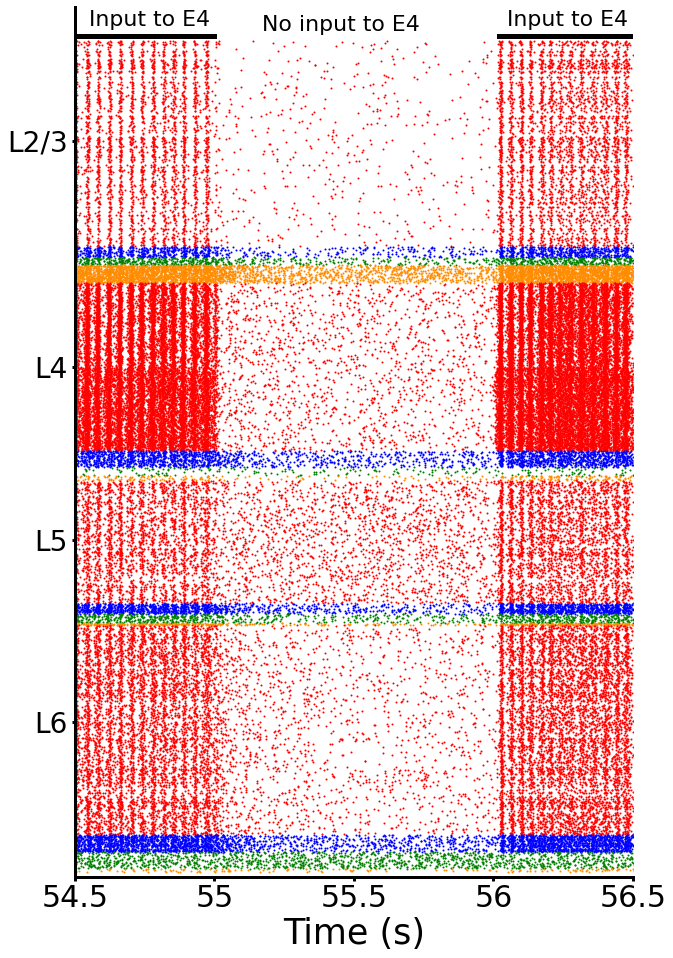

In [6]:
#Time of the simulation I am interested in looking at 
xmin=54.5*1000
xmax=56.5*1000

#Need this for the raster plot
Ntot=5000 #total number of neurons (rows) in the raster plot
N1=int(0.0192574218*Ntot) #Numbers of cells in each layer L1,L2/3,L4,L5
N2_3=int(0.291088453*Ntot)
N4=int(0.237625904*Ntot)
N5=int(0.17425693*Ntot)
N6= Ntot-N2_3-N4-N5

#FROM LAYER 2/3 TOP to LAYER 6 bottom of the plot
#I need the indexes to build the rows
i_e23=S_e23i+ N[0][3]+N[0][2]+N[0][1]
i_pv23=S_pv23i+ N[0][3]+N[0][2]
i_sst23=S_sst23i+ N[0][3]
i_vip23=S_vip23i

i_e4=S_e4i+ N[1][3]+N[1][2]+N[1][1]
i_pv4=S_pv4i+ N[1][3]+N[1][2]
i_sst4=S_sst4i+ N[1][3]
i_vip4=S_vip4i

i_e5=S_e5i+ N[2][3]+N[2][2]+N[2][1]
i_pv5=S_pv5i+ N[2][3]+N[2][2]
i_sst5=S_sst5i+ N[2][3]
i_vip5=S_vip5i

i_e6=S_e6i+ N[3][3]+N[3][2]+N[3][1]
i_pv6=S_pv6i+ N[3][3]+N[3][2]
i_sst6=S_sst6i+ N[3][3]
i_vip6=S_vip6i


f,ax= plt.subplots(figsize=(10,16))

#Layer 2/3
ax.plot(S_e23t,i_e23+N6+N5+N4,'.', markersize=2,color='r', label='E')
ax.plot(S_pv23t,i_pv23+N6+N5+N4,'.', markersize=2,color='b', label='PV')
ax.plot(S_sst23t,i_sst23+N6+N5+N4,'.', markersize=2,color='g', label='SST')
ax.plot(S_vip23t,i_vip23+N6+N5+N4,'.', markersize=2,color='darkorange', label='VIP')
#Layer 4
ax.plot(S_e4t,i_e4+N6+N5,'.', markersize=2,color='r')
ax.plot(S_pv4t,i_pv4+N6+N5,'.', markersize=2,color='b')
ax.plot(S_sst4t,i_sst4+N6+N5,'.', markersize=2,color='g')
ax.plot(S_vip4t,i_vip4+N6+N5,'.', markersize=2,color='darkorange')
#Layer 5
ax.plot(S_e5t,i_e5+N6,'.', markersize=2,color='r')
ax.plot(S_pv5t,i_pv5+N6,'.', markersize=2,color='b')
ax.plot(S_sst5t,i_sst5+N6,'.', markersize=2,color='g')
ax.plot(S_vip5t,i_vip5+N6,'.', markersize=2,color='darkorange')
#Layer 6
ax.plot(S_e6t,i_e6,'.', markersize=2,color='r')
ax.plot(S_pv6t,i_pv6,'.', markersize=2,color='b')
ax.plot(S_sst6t,i_sst6,'.', markersize=2,color='g')
ax.plot(S_vip6t,i_vip6,'.', markersize=2,color='darkorange')

ax.set_xlim(xmin,xmax) #I plot the desired part, defined above
plt.ylim(-30,5205)
#plt.legend(fontsize=19) #If you want to plot the standard legend


#Layout
plt.setp(ax.spines.values(), linewidth=3)
#Remove only 2 edges of the box
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

#ticks size
plt.tick_params(axis='both', which='major', labelsize=30)
plt.xticks(size=30)
plt.locator_params(axis='x', nbins=5)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.xlabel('Time (s)', size=35)
#plt.ylabel('neuron index', size=30)
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)

#Create names on the axis
lab = ('L6', 'L5',
                'L4', 'L2/3')
y_pos = [900,2000,3040,4400]
plt.yticks(y_pos, lab,size=28)
#If you don't want the label on y axis uncomment this
#ax.get_yaxis().set_visible(False)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels= ['54.5','55','55.5','56','56.5']
ax.set_xticklabels(labels)

plt.text(54550,5090,'Input to E4',rotation=360,size=22)
plt.axhline(5031, xmin =0.0, xmax =0.25,color='k', linewidth=5)
plt.text(55170,5060,'No input to E4',rotation=360,size=22)
plt.text(56050,5090,'Input to E4',rotation=360,size=22)
plt.axhline(5031, xmin =0.76, xmax =1,color='k', linewidth=5)



#Save fig
plt.savefig('IMAGES/Fig5_SUPP_onOff.png')

#Show fig
plt.show()

In [7]:
#OTHER PLOTS IN SUPPLEMENTARY

In [7]:
#Folders where the spikes files ares stored (uncomment the one you want to plot)

#FOR fixed or plastic weights supplementary fig
#a="simulations_data/Cont/Spikes_files_30pA" #plastic weights
#a='simulations_data/Sp_input_1_2' #fixed weights


#FOR input to e4 supplementary fig
#a="simulations_data/Cont/Spikes_files_150pA"
#a="simulations_data/Cont/Spikes_files_100pA"
#a="simulations_data/Cont/Spikes_files_60pA"
#a="simulations_data/Cont/Spikes_files_50pA"
#a="simulations_data/Cont/Spikes_files_40pA"
a="simulations_data/Cont/Spikes_files_30pA"
#a="simulations_data/Cont/Spikes_files_15pA"
#a="simulations_data/Cont/Spikes_files_0pA"


#FOR input to e5 supplementary fig
#a="simulations_data/Cont/Spikes_files_e5_60pA"
#a="simulations_data/Cont/Spikes_files_e5_50pA"
#a="simulations_data/Cont/Spikes_files_e5_40pA"
#a="simulations_data/Cont/Spikes_files_e5_30pA"
#a="simulations_data/Cont/Spikes_files_e5_15pA"
#a="simulations_data/Cont/Spikes_files_e5_0pA"


#FOR input to pv4 supplementary fig
#a='simulations_data/Cont/PV_input/Spikes_files_cont_inputpv70'
#a='simulations_data/Cont/PV_input/Spikes_files_cont_inputpv60'
#a='simulations_data/Cont/PV_input/Spikes_files_cont_inputpv50'
#a='simulations_data/Cont/PV_input/Spikes_files_cont_inputpv40'
#a='simulations_data/Cont/PV_input/Spikes_files_cont_inputpv30'
#a='simulations_data/Cont/PV_input/Spikes_files_cont_inputpv20'

In [8]:
#Upload the spikes files
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

<ipython-input-8-0e80717f468d>:3: UserWarning: loadtxt: Empty input file: "simulations_data/Cont/Spikes_files_30pA/S_vip1i.txt"
  S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
<ipython-input-8-0e80717f468d>:4: UserWarning: loadtxt: Empty input file: "simulations_data/Cont/Spikes_files_30pA/S_vip1t.txt"
  S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000


In [9]:
#Time of the simulation I am interested in looking at 
#I uncomment the correct one for the desired plot

# xmin=54.0*1000
# xmax=55.0*1000

# xmin=38*1000
# xmax=39*1000

# xmin=45*1000
# xmax=46*1000


#FOR SUPP. fixed/plastic weights
# xmin=0*1000
# xmax=3*1000


#FOR SUPP. input to E4
xmin=54.5*1000
xmax=55.5*1000

<ipython-input-10-a81c157e5c56>:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


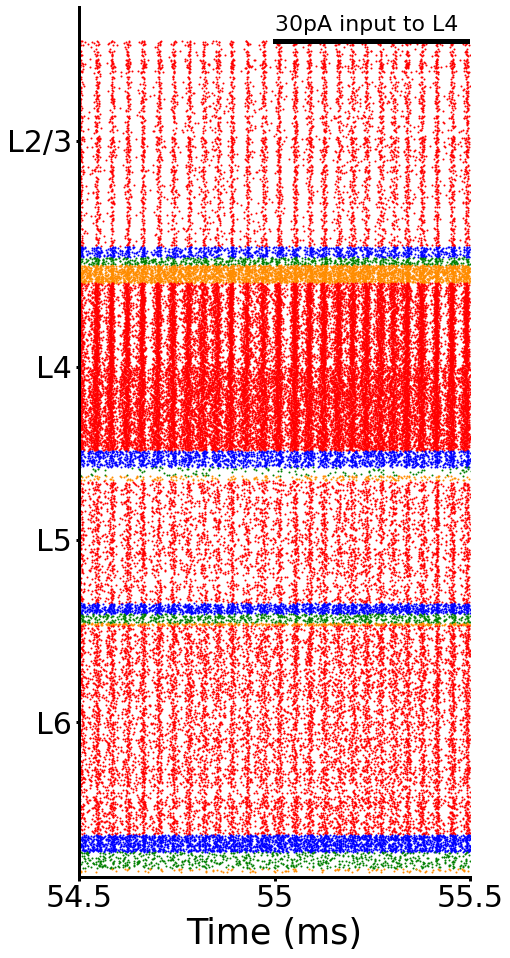

In [10]:
#raster plot with all layers in the same plot
#Need this for the raster plot
Ntot=5000 #total number of neurons (rows) in the raster plot
N1=int(0.0192574218*Ntot) #Numbers of cells in each layer L1,L2/3,L4,L5
N2_3=int(0.291088453*Ntot)
N4=int(0.237625904*Ntot)
N5=int(0.17425693*Ntot)
N6= Ntot-N2_3-N4-N5

#FROM LAYER 2/3 TOP to LAYER 6 bottom of the plot
#I need the indexes to build the rows
i_e23=S_e23i+ N[0][3]+N[0][2]+N[0][1]
i_pv23=S_pv23i+ N[0][3]+N[0][2]
i_sst23=S_sst23i+ N[0][3]
i_vip23=S_vip23i

i_e4=S_e4i+ N[1][3]+N[1][2]+N[1][1]
i_pv4=S_pv4i+ N[1][3]+N[1][2]
i_sst4=S_sst4i+ N[1][3]
i_vip4=S_vip4i

i_e5=S_e5i+ N[2][3]+N[2][2]+N[2][1]
i_pv5=S_pv5i+ N[2][3]+N[2][2]
i_sst5=S_sst5i+ N[2][3]
i_vip5=S_vip5i

i_e6=S_e6i+ N[3][3]+N[3][2]+N[3][1]
i_pv6=S_pv6i+ N[3][3]+N[3][2]
i_sst6=S_sst6i+ N[3][3]
i_vip6=S_vip6i


f,ax= plt.subplots(figsize=(7,16))

#Layer 2/3
ax.plot(S_e23t,i_e23+N6+N5+N4,'.', markersize=2,color='r', label='E')
ax.plot(S_pv23t,i_pv23+N6+N5+N4,'.', markersize=2,color='b', label='PV')
ax.plot(S_sst23t,i_sst23+N6+N5+N4,'.', markersize=2,color='g', label='SST')
ax.plot(S_vip23t,i_vip23+N6+N5+N4,'.', markersize=2,color='darkorange', label='VIP')
#Layer 4
ax.plot(S_e4t,i_e4+N6+N5,'.', markersize=2,color='r')
ax.plot(S_pv4t,i_pv4+N6+N5,'.', markersize=2,color='b')
ax.plot(S_sst4t,i_sst4+N6+N5,'.', markersize=2,color='g')
ax.plot(S_vip4t,i_vip4+N6+N5,'.', markersize=2,color='darkorange')
#Layer 5
ax.plot(S_e5t,i_e5+N6,'.', markersize=2,color='r')
ax.plot(S_pv5t,i_pv5+N6,'.', markersize=2,color='b')
ax.plot(S_sst5t,i_sst5+N6,'.', markersize=2,color='g')
ax.plot(S_vip5t,i_vip5+N6,'.', markersize=2,color='darkorange')
#Layer 6
ax.plot(S_e6t,i_e6,'.', markersize=2,color='r')
ax.plot(S_pv6t,i_pv6,'.', markersize=2,color='b')
ax.plot(S_sst6t,i_sst6,'.', markersize=2,color='g')
ax.plot(S_vip6t,i_vip6,'.', markersize=2,color='darkorange')

ax.set_xlim(xmin,xmax) #I plot the desired part, defined above
plt.ylim(-30,5205)
#plt.legend(fontsize=19) #If you want to plot the standard legend


#Layout
plt.setp(ax.spines.values(), linewidth=3)
#Remove only 2 edges of the box
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

#Ticks size and lables
plt.xticks(size=30)
plt.locator_params(axis='x', nbins=5) #How many ticks on x axis
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.xlabel('Time (ms)', size=35)
#plt.ylabel('neuron index', size=30)

#Create names of layers on the y-axis
lab = ('L6', 'L5',
               'L4', 'L2/3')
y_pos = [900,2000,3040,4400] #position where to put the labels
plt.yticks(y_pos, lab,size=28)
plt.yticks(size=30)
#If you don't want the labels on y axis uncomment this
#ax.get_yaxis().set_visible(False)
plt.locator_params(axis='x', nbins=2)

#Use the one correct for the plot
labels = [item.get_text() for item in ax.get_xticklabels()]
#labels= ['54','54.5','55']
#labels= ['38','38.5','39']
#labels= ['1','1.5','2']
labels= ['54.5','55','55.5']
ax.set_xticklabels(labels)

#NO LABELS ON y AXIS
#ax1.get_yaxis().set_visible(False)

# Add text (Uncomment the one you want for the specific plot)
#FOR SUPPLEMENTARY FIG OF input to E4
# plt.text(55000,5060,'150pA input to L4',rotation=360,size=22)
# plt.text(55000,5060,'100pA input to L4',rotation=360,size=22)
# plt.text(55000,5060,'60pA input to L4',rotation=360,size=22)
# plt.text(55000,5060,'50pA input to L4',rotation=360,size=22)
# plt.text(55000,5060,'40pA input to L4',rotation=360,size=22)
plt.text(55000,5060,'30pA input to L4',rotation=360,size=22)
# plt.text(55000,5060,'15pA input to L4',rotation=360,size=22)
# plt.text(55000,5060,'no input to L4',rotation=360,size=22)
plt.axhline(5001, xmin =0.5, xmax =1,color='k', linewidth=5)

#FOR SUPPLEMENTARY FIG OF input to E5
# plt.text(55000,5060,'60pA input to L5',rotation=360,size=22)
# plt.text(55000,5060,'50pA input to L5',rotation=360,size=22)
# plt.text(55000,5060,'40pA input to L5',rotation=360,size=22)
# plt.text(55000,5060,'30pA input to L5',rotation=360,size=22)
# plt.text(55000,5060,'15pA input to L5',rotation=360,size=22)
# plt.text(55000,5060,'no input to L5',rotation=360,size=22)
# plt.axhline(5001, xmin =0.5, xmax =1,color='k', linewidth=5)


#FOR SUPPLEMENTARY FIG OF input to PV4
#plt.text(55000,5060,'70pA input to PV4',rotation=360,size=22)
#plt.text(55000,5060,'50pA input to PV4',rotation=360,size=22)
#plt.text(55000,5060,'30pA input to PV4',rotation=360,size=22)
#plt.text(55000,5060,'20pA input to PV4',rotation=360,size=22)
#plt.text(55000,5060,'15pA input to PV4',rotation=360,size=22)
#plt.axhline(5001, xmin =0.5, xmax =1,color='k', linewidth=5)

#FOR SUPPLEMENTARY FIG OF FIXED AND PLASTIC WEIGHTS
# plt.text(800,5060,'Input to E4',rotation=360,size=22)
# plt.axhline(5001, xmin =0.18, xmax =1,color='k', linewidth=5)
# plt.title('Fixed weights', fontsize=25)
# plt.title('Plastic weights (STDP)', fontsize=25)

#Save fig

#SUPP FIG plastic/foxed
#plt.savefig('IMAGES/fig6_SUPP_plasticWEIGHTS.png')
#plt.savefig('IMAGES/fig6_SUPP_fixedWEIGHTS.png')

#SUPP FIg input to E4
#plt.savefig('IMAGES/fig6_SUPP_150pA.png')
#plt.savefig('IMAGES/fig6_SUPP_100pA.png')
#plt.savefig('IMAGES/fig6_SUPP_60pA.png')
#plt.savefig('IMAGES/fig6_SUPP_50pA.png')
#plt.savefig('IMAGES/fig6_SUPP_40pA.png')
plt.savefig('IMAGES/Fig5_SUPP_30pA.png')
#plt.savefig('IMAGES/fig6_SUPP_15pA.png')
#plt.savefig('IMAGES/fig6_SUPP_0pA.png')

#SUPP FIg input to E5
#plt.savefig('IMAGES/fig6_SUPP_e5_60pA.png')
#plt.savefig('IMAGES/fig6_SUPP_e5_50pA.png')
#plt.savefig('IMAGES/fig6_SUPP_e5_40pA.png')
#plt.savefig('IMAGES/fig6_SUPP_e5_30pA.png')
#plt.savefig('IMAGES/fig6_SUPP_e5_15pA.png')
#plt.savefig('IMAGES/fig6_SUPP_e5_0pA.png')

#SUPP FIg input to PV4
#plt.savefig('IMAGES/fig6_SUPP_pv4_70pA.png')
#plt.savefig('IMAGES/fig6_SUPP_pv4_50pA.png')
#plt.savefig('IMAGES/fig6_SUPP_pv4_30pA.png')
#plt.savefig('IMAGES/fig6_SUPP_pv4_20pA.png')
#plt.savefig('IMAGES/fig6_SUPP_pv4_10pA.png')

plt.show()